In [1]:
import deepxde as dde
from deepxde.backend import tf
import numpy as np
import matplotlib.pyplot as plt

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


In [2]:
k = 0.4
L = 1
n = 1

In [3]:
geom = dde.geometry.Interval(0,L)
timedomain = dde.geometry.TimeDomain(0,n)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

In [4]:
ic = dde.icbc.IC(geomtime, lambda x: np.sin(n* np.pi * x[:,0:1]/L), lambda _, on_initial: on_initial)

In [5]:
input_array = np.array([[1,2,3],
                        [4,5,6],
                        [7,8,9]])

lambda_function = lambda x : 2*x[:,0:1]

result_array = lambda_function(input_array)

print(result_array)

[[ 2]
 [ 8]
 [14]]


In [6]:
cond_lambda = lambda x : "Even" if x%2 == 0 else "Odd"
print(cond_lambda(4))
print(cond_lambda(3))

Even
Odd


In [7]:
def double_first_column(input_array):
    print("input_array", input_array)
    print("input_array.shape", input_array.shape)
    print("input_array[:, 0:1]", input_array[:, 0:1])
    print("input_array[:, 0:1].shape", input_array[:, 0:1].shape)
    print("input_array[:, 0]", input_array[:, 0])
    print("input_array[:, 0].shape", input_array[:, 0].shape)
    return 2 * input_array[:, 0:1]

bc = dde.icbc.DirichletBC(
    geomtime, 
    lambda input_array: double_first_column(input_array),
    lambda _,
    on_boundary: on_boundary)

In [8]:
def pde(comp,u):
    du_t = dde.grad.jacobian(u,comp, i=0,j=1)
    du_xx = dde.grad.hessian(u,comp, i=0,j=0)
    return du_t - k * du_xx

In [9]:
data = dde.data.TimePDE(geomtime,
                       pde,
                       [bc,ic],
                       num_domain = 2540,
                       num_boundary = 80,
                       num_initial = 160,
                       num_test = 2540,
                       )

In [10]:
net = dde.nn.FNN([2] + [20]*3+ [1], "tanh", "Glorot normal")

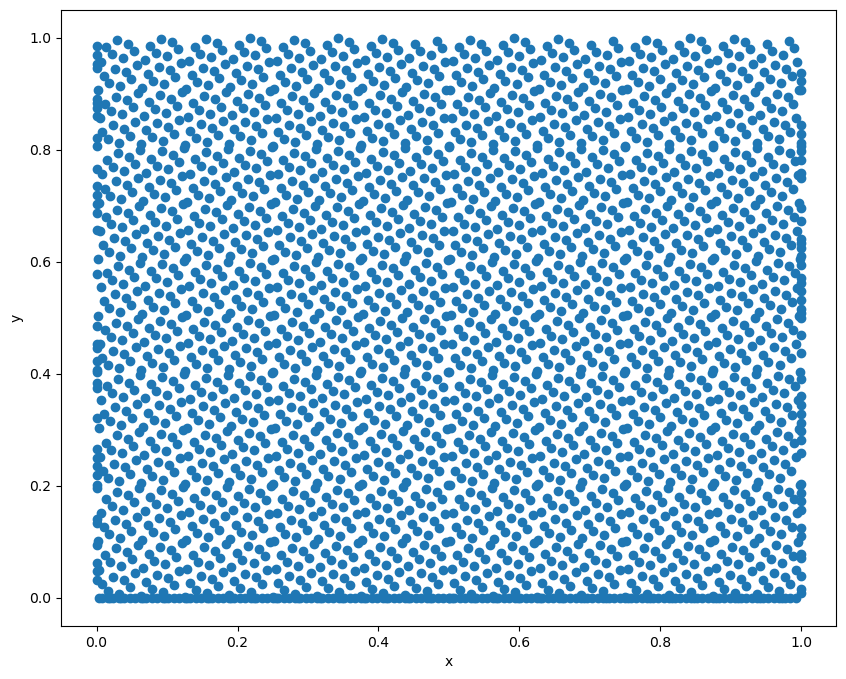

In [11]:
plt.figure(figsize = (10,8))
plt.scatter(data.train_x_all[:,0],data.train_x_all[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
model = dde.Model(data, net)

In [13]:
model.compile("adam", lr=1e-3)

Compiling model...
'compile' took 0.004281 s



In [14]:
losshistory, train_state = model.train(iterations = 15000)

Training model...



C:\Users\mecha\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Cause: could not parse the source code of <function <lambda> at 0x000001C31AD34FE0>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x000001C31AD34FE0>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
input_array [[1.        0.796875 ]
 [0.        0.140625 ]
 [0.        0.71875  ]
 [0.        0.96875  ]
 [1.        0.84375  ]
 [1.        0.2578125]
 [1.        0.015625 ]
 [0.        0.765625 ]
 [0.        0.859375 ]
 [1.        0.5078125]
 [1.        0.5625   ]
 [0.        0.3828125]
 [1.        0.7578125]
 [1.        0.0390625]
 [1.        0.640625 ]
 [0.        0.484375 ]
 [1.

Step      Train loss                        Test loss                         Test metric
0         [1.74e-02, 7.05e-01, 1.65e-01]    [1.56e-02, 7.05e-01, 1.65e-01]    []  
1000      [7.26e-03, 5.43e-02, 4.69e-02]    [3.29e-03, 5.43e-02, 4.69e-02]    []  
2000      [5.93e-03, 3.12e-02, 1.96e-02]    [3.72e-03, 3.12e-02, 1.96e-02]    []  
3000      [4.67e-03, 2.43e-02, 1.59e-02]    [3.25e-03, 2.43e-02, 1.59e-02]    []  
4000      [3.34e-03, 2.01e-02, 1.36e-02]    [2.21e-03, 2.01e-02, 1.36e-02]    []  
5000      [6.41e-03, 1.62e-02, 1.36e-02]    [3.08e-03, 1.62e-02, 1.36e-02]    []  
6000      [2.63e-03, 1.48e-02, 1.13e-02]    [1.74e-03, 1.48e-02, 1.13e-02]    []  
7000      [2.30e-03, 1.28e-02, 1.05e-02]    [1.47e-03, 1.28e-02, 1.05e-02]    []  
8000      [2.10e-03, 1.13e-02, 9.54e-03]    [1.38e-03, 1.13e-02, 9.54e-03]    []  
9000      [1.93e-03, 9.90e-03, 8.87e-03]    [1.32e-03, 9.90e-03, 8.87e-03]    []  
10000     [1.75e-03, 8.64e-03, 8.43e-03]    [1.16e-03, 8.64e-03, 8.43e-03]    []

In [15]:
#Limited-memory Broyden-Fletcher-Goldfarb-Shanno
model.compile("L-BFGS-B")
losshistory, train_state = model.train()

Compiling model...
'compile' took 0.022056 s

Training model...

input_array [[1.        0.796875 ]
 [0.        0.140625 ]
 [0.        0.71875  ]
 [0.        0.96875  ]
 [1.        0.84375  ]
 [1.        0.2578125]
 [1.        0.015625 ]
 [0.        0.765625 ]
 [0.        0.859375 ]
 [1.        0.5078125]
 [1.        0.5625   ]
 [0.        0.3828125]
 [1.        0.7578125]
 [1.        0.0390625]
 [1.        0.640625 ]
 [0.        0.484375 ]
 [1.        0.125    ]
 [1.        0.28125  ]
 [1.        0.90625  ]
 [0.        0.40625  ]
 [0.        0.046875 ]
 [0.        0.1953125]
 [1.        0.171875 ]
 [1.        0.109375 ]
 [1.        0.0078125]
 [1.        0.203125 ]
 [0.        0.953125 ]
 [1.        0.75     ]
 [1.        0.78125  ]
 [0.        0.703125 ]
 [1.        0.6328125]
 [1.        0.828125 ]
 [0.        0.234375 ]
 [0.        0.875    ]
 [0.        0.21875  ]
 [0.        0.4453125]
 [1.        0.9375   ]
 [0.        0.9453125]
 [0.        0.65625  ]
 [1.        0.078125 ]
 [1

Saving loss history to C:\Users\mecha\OneDrive\デスクトップ\main\Course_5_pinns\05_deepxde_1D_pde_heat\loss.dat ...
Saving training data to C:\Users\mecha\OneDrive\デスクトップ\main\Course_5_pinns\05_deepxde_1D_pde_heat\train.dat ...
Saving test data to C:\Users\mecha\OneDrive\デスクトップ\main\Course_5_pinns\05_deepxde_1D_pde_heat\test.dat ...


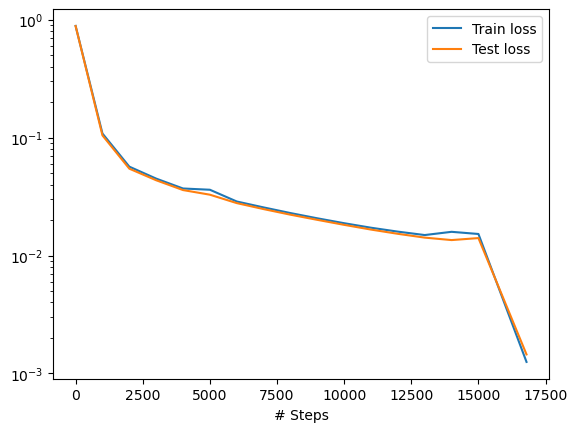

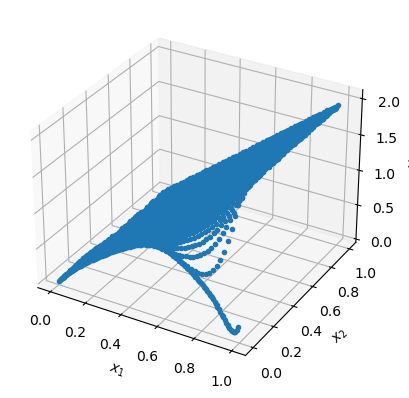

In [17]:
dde.saveplot(losshistory,train_state, issave= True, isplot=True)